In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings("ignore")

### 1.read data and data procesing

In [3]:
# read data
df = pd.read_csv('./HousePrice(including sentiment).csv')

# data processing
# filling missing data
df['total income'].fillna(method='pad',inplace=True)
# create variable 'average disposable income'
df['average disposable income'] = df['total income']/df['Domestic Households']
# In case the denominator is 0
df['land area'] = df['land area'].apply(lambda x: 1 if x == 0 else x)
# create variable 'price per land'
df['price per land'] = df['land price']/df['land area']
df.head()

,date,Housing CPI,unemployment rate,Domestic Households,total income,land area,land price,Total loans approved,sentiment,Domestic Price Indices,average disposable income,price per land
0,2002-1,72.7,6.3,2079.5,103629.3333,1.0,0.0,11467,6.392807,74.1,49.833774,0.000000
1,2002-2,72.5,6.6,2083.8,103629.3333,10290.0,301.0,7947,6.933953,73.9,49.730940,0.029252
2,2002-3,72.2,6.9,2087.2,103629.3333,1.0,0.0,8206,5.776455,73.3,49.649930,0.000000
3,2002-4,71.9,7.1,2091.7,103079.6667,48170.0,2970.0,8816,5.716957,72.3,49.280330,0.061657
4,2002-5,71.7,7.3,2097.1,103079.6667,1.0,0.0,10209,5.808039,72.4,49.153434,0.000000


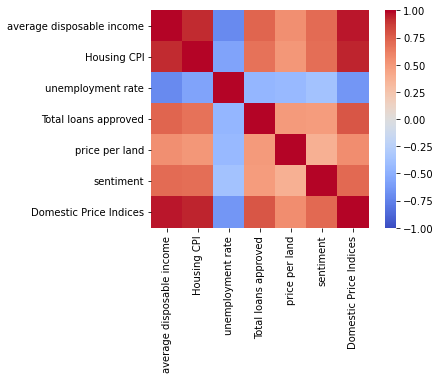

In [4]:
# plot heatmap to check correlations between variables
df1 = df[['average disposable income','Housing CPI','unemployment rate','Total loans approved','price per land','sentiment','Domestic Price Indices']]
corrmatrix = df1.corr('spearman')
sns.heatmap(corrmatrix,square=True,vmax=1,vmin=-1,center=0.0,cmap='coolwarm')
plt.show()

### 2. feature selection

In [5]:
# model without sentiment index
# response
y = df['Domestic Price Indices']
# features
X = df[['average disposable income','unemployment rate','Total loans approved','price per land']]

# model with sentiment index
# response
y1 = df['Domestic Price Indices']
# features
X1 = df[['average disposable income','unemployment rate','Total loans approved','price per land','sentiment']]

### 3. standardization and partitioning

In [17]:
# standardization
Transfer = StandardScaler()
X = Transfer.fit_transform(X)
Transfer = StandardScaler()
X1 = Transfer.fit_transform(X1)

# Data set partitioning
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=10)

# data Structures used in model assessment
models_name = ['Ridge', 'Decision Tree', 'Random Forest', 'SVM', 'xgboost']
# two-dimension array, 0-origin models, 1-sentiment-models
models = [[],[]]
models_metrics = {'mse': [[], []], 'mae': [[], []], \
                'test_r2_score': [[], []], 'train_r2_score': [[], []]}

# function to save model's metrics into dict for evaluation
# parameter: models_metrics - dict
#            mse - numerical value
#            mae - numerical value
#            r2_score - numerical value
#            type - 0 for origin model, 1 for model with sentiment
# return: none
def record_metrics(models_metrics, mse, mae, r2_score, type):
    models_metrics['mse'][type].append(mse)
    models_metrics['mae'][type].append(mae)
    models_metrics['test_r2_score'][type].append(r2_score)


## 4.training data
### 4.1. ridge regression
#### 1) model without sentiment index

In [18]:
estimator = linear_model.RidgeCV()
estimator.fit(x_train,y_train)
print('Ridge coefficient:\n',estimator.coef_)
print('Ridge intercept:\n',estimator.intercept_)
models[0].append(estimator)

y_predict = estimator.predict(x_test)
# model evaluation
Ridge_mse = mean_squared_error(y_test,y_predict)
print('Ridge mse:',Ridge_mse)
Ridge_mae = mean_absolute_error(y_test,y_predict)
print('Ridge mae:',Ridge_mae)
Ridge_score = r2_score(y_test,y_predict)
print('R2 score: ',Ridge_score)

record_metrics(models_metrics, Ridge_mse, Ridge_mae, Ridge_score, 0)


Ridge coefficient:
 [116.45091112  13.33220002   4.33769863   0.58982215]
Ridge intercept:
 210.92934965590976
Ridge mse: 576.3557674966141
Ridge mae: 18.779584777252488
R2 score:  0.9570359424005072


#### 2) model with sentiment index

In [19]:
estimator = linear_model.RidgeCV()
estimator.fit(x_train1,y_train1)
print('Ridge coefficient:\n',estimator.coef_)
print('Ridge intercept:\n',estimator.intercept_)

models[1].append(estimator)
y_predict1 = estimator.predict(x_test1)
# model evaluation
Ridge_mse1 = mean_squared_error(y_test1,y_predict1)
print('Ridge mse:',Ridge_mse1)
Ridge_mae1 = mean_absolute_error(y_test1,y_predict1)
print('Ridge mae:',Ridge_mae1)
Ridge_score1 = r2_score(y_test1,y_predict1)
print('R2 score: ',Ridge_score1)

record_metrics(models_metrics, Ridge_mse1, Ridge_mae1, Ridge_score1, 1)

Ridge coefficient:
 [102.75509876   9.39573037   5.98714238   0.20446041  13.32851067]
Ridge intercept:
 210.68889329932298
Ridge mse: 557.3356227891792
Ridge mae: 18.055500624918242
R2 score:  0.9584537864455321


In [20]:
# obtain p-value of each variable
import regressors.stats
print(regressors.stats.summary(estimator,x_test1,y_test1))

Residuals:
     Min      1Q  Median       3Q      Max
-35.7848 -6.4143  6.0033  19.8134  65.8686


Coefficients:
              Estimate  Std. Error  t value   p value
_intercept  210.688893    3.465095  60.8032  0.000000
x1          102.755099    6.946086  14.7932  0.000000
x2            9.395730    4.618907   2.0342  0.047598
x3            5.987142    4.599320   1.3017  0.199348
x4            0.204460    3.412541   0.0599  0.952478
x5           13.328511    5.294559   2.5174  0.015290
---
R-squared:  0.95845,    Adjusted R-squared:  0.95351
F-statistic: 193.78 on 5 features
None


### 4.2 Decision tree
#### 1) model without sentiment index

In [21]:
estimator = DecisionTreeRegressor(random_state=10,max_depth=5)
# adjust hyper-parameter
estimator= GridSearchCV(estimator,param_grid ={'max_depth':range(1,10)},cv=10)
estimator.fit(x_train,y_train)
models[0].append(estimator)

print('best parameter: ',estimator.best_params_)
y_predict = estimator.predict(x_test)
# model evaluation
DT_mse = mean_squared_error(y_test,y_predict)
print('DT mse:',DT_mse)
DT_mae = mean_absolute_error(y_test,y_predict)
print('DT mae:',DT_mae)
DT_score = r2_score(y_test,y_predict)
print('R2 score: ',DT_score)

record_metrics(models_metrics, DT_mse, DT_mae, DT_score, 0)

best parameter:  {'max_depth': 5}
DT mse: 370.0838183187905
DT mae: 11.756351949402928
R2 score:  0.9724123477484206


#### 2) model with sentiment index

In [22]:
estimator = DecisionTreeRegressor(random_state=10, max_depth=10)
# adjust hyper-parameter
estimator= GridSearchCV(estimator,param_grid ={'max_depth':range(1,15)},cv=10)
estimator.fit(x_train1,y_train1)
models[1].append(estimator)

print('best parameter: ',estimator.best_params_)
y_predict1 = estimator.predict(x_test1)
# model evaluation
DT_mse1 = mean_squared_error(y_test1,y_predict1)
print('DT mse:',DT_mse1)
DT_mae1 = mean_absolute_error(y_test1,y_predict1)
print('DT mae:',DT_mae1)
DT_score1 = r2_score(y_test1,y_predict1)
print('R2 score: ',DT_score1)

record_metrics(models_metrics, DT_mse1, DT_mae1, DT_score1, 1)

best parameter:  {'max_depth': 10}
DT mse: 276.31140624999995
DT mae: 9.163541666666665
R2 score:  0.9794025498780289


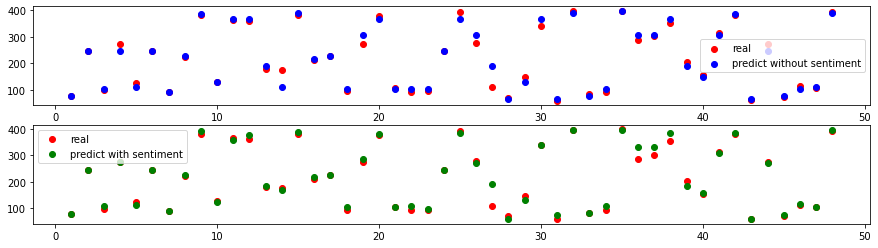

In [23]:
plt.figure(figsize=(15,4))
n = len(x_test) + 1
plt.subplot(2,1,1)
plt.scatter(np.arange(1,n), y_test, c ='r',label="real")
plt.scatter(np.arange(1,n), y_predict,c='b' , label="predict without sentiment")
plt.legend()
plt.subplot(2,1,2)
plt.scatter(np.arange(1,n), y_test, c='r' ,label="real")
plt.scatter(np.arange(1,n), y_predict1,c='g', label="predict with sentiment")
plt.legend()
plt.show()

### 4.3 Random Forest
#### 1) model without sentiment index

In [24]:
estimator = RandomForestRegressor(n_estimators=30,max_depth=8,random_state=10)
# adjust hyper-parameter
estimator= GridSearchCV(estimator, param_grid ={'max_depth':range(1,10)},cv=10)
estimator.fit(x_train,y_train)
models[0].append(estimator)

print('best parameter: ',estimator.best_params_)
y_predict = estimator.predict(x_test)
# model evaluation
RF_mse = mean_squared_error(y_test,y_predict)
print('RF mse:',RF_mse)
RF_mae = mean_absolute_error(y_test,y_predict)
print('RF mae:',RF_mae)
RF_score = r2_score(y_test,y_predict)
print('R2 score: ',RF_score)

record_metrics(models_metrics, RF_mse, RF_mae, RF_score, 0)

best parameter:  {'max_depth': 8}
RF mse: 249.90064511561002
RF mae: 10.839951556738024
R2 score:  0.9813713225122527


#### 2) model with sentiment index

In [25]:
# model with sentiment index
estimator = RandomForestRegressor(n_estimators=30,max_depth=7,random_state=10)
# adjust hyper-parameter
estimator= GridSearchCV(estimator, param_grid ={'max_depth':range(1,10)},cv=10)
estimator.fit(x_train1,y_train1)
models[1].append(estimator)

print('best parameter: ',estimator.best_params_)
y_predict1 = estimator.predict(x_test1)
# model evaluation
RF_mse1 = mean_squared_error(y_test1,y_predict1)
print('RF mse:',RF_mse1)
RF_mae1 = mean_absolute_error(y_test1,y_predict1)
print('RF mae:',RF_mae1)
RF_score1 = r2_score(y_test1,y_predict1)
print('R2 score: ',RF_score1)

record_metrics(models_metrics, RF_mse1, RF_mae1, RF_score1, 1)

best parameter:  {'max_depth': 7}
RF mse: 220.41728598404993
RF mae: 10.336048185245552
R2 score:  0.9835691399219003


### 4.4 SVM
#### 1) model without sentiment index

In [26]:
# model without sentiment index
estimator = svm.SVR(kernel='linear')
estimator.fit(x_train,y_train)
y_predict = estimator.predict(x_test)
models[0].append(estimator)

# model evaluation
svm_mse = mean_squared_error(y_test,y_predict)
print('svm mse:',svm_mse)
svm_mae = mean_absolute_error(y_test,y_predict)
print('svm mae:',svm_mae)
svm_score = r2_score(y_test,y_predict)
print('R2 score: ',svm_score)

record_metrics(models_metrics, svm_mse, svm_mae, svm_score, 0)

svm mse: 1287.7721814923937
svm mae: 26.97115600426405
R2 score:  0.9040038786789987


#### 2) model with sentiment index

In [27]:
# model with sentiment index
estimator = svm.SVR(kernel='linear')
estimator.fit(x_train1,y_train1)
models[1].append(estimator)

y_predict1 = estimator.predict(x_test1)

# model evaluation
svm_mse1 = mean_squared_error(y_test1,y_predict1)
print('svm mse:',svm_mse1)
svm_mae1 = mean_absolute_error(y_test1,y_predict1)
print('svm mae:',svm_mae1)
svm_score1 = r2_score(y_test1,y_predict1)
print('R2 score: ',svm_score1)

record_metrics(models_metrics, svm_mse1, svm_mae1, svm_score1, 1)

svm mse: 1110.0417615225615
svm mae: 26.85405737262359
R2 score:  0.9172526747029073


### 4.5 xgboost
#### 1) model without sentiment index

In [28]:
# model without sentiment index
estimator = XGBRegressor(learning_rate=0.1,max_depth=6,n_estimators=60,min_child_weight=4,gamma=0.1,subsample=0.9,colsample_bytree=0.8)
# adjust parameter
estimator= GridSearchCV(estimator, param_grid ={'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]},cv=10)
estimator.fit(x_train,y_train)
models[0].append(estimator)

print('best parameter: ',estimator.best_params_)
y_predict = estimator.predict(x_test)
# model evaluation
xg_mse = mean_squared_error(y_test,y_predict)
print('xg mse:',xg_mse)
xg_mae = mean_absolute_error(y_test,y_predict)
print('xg mae:',xg_mae)
xg_score = r2_score(y_test,y_predict)
print('R2 score: ',xg_score)

record_metrics(models_metrics, xg_mse, xg_mae, xg_score, 0)

best parameter:  {'colsample_bytree': 0.8}
xg mse: 234.44237416904932
xg mae: 11.349598773320517
R2 score:  0.9825236490452574


#### 2) model with sentiment index

In [29]:
# model with sentiment index
estimator = XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=70,min_child_weight=4,gamma=0.3,subsample=0.9,colsample_bytree=0.8)
# adjust parameter
estimator= GridSearchCV(estimator, param_grid ={'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]},cv=10)
estimator.fit(x_train1,y_train1)
models[1].append(estimator)

print('best parameter: ',estimator.best_params_)
y_predict1 = estimator.predict(x_test1)
# model evaluation
xg_mse1 = mean_squared_error(y_test1,y_predict1)
print('xg mse:',xg_mse1)
xg_mae1 = mean_absolute_error(y_test1,y_predict1)
print('xg mae:',xg_mae1)
xg_score1 = r2_score(y_test1,y_predict1)
print('R2 score: ',xg_score1)

record_metrics(models_metrics, xg_mse1, xg_mae1, xg_score1, 1)

best parameter:  {'colsample_bytree': 0.8}
xg mse: 223.7780422522528
xg mae: 11.283283122380574
R2 score:  0.9833186145796936


### 5 Model Evaluation
#### 1) Residuals scatter

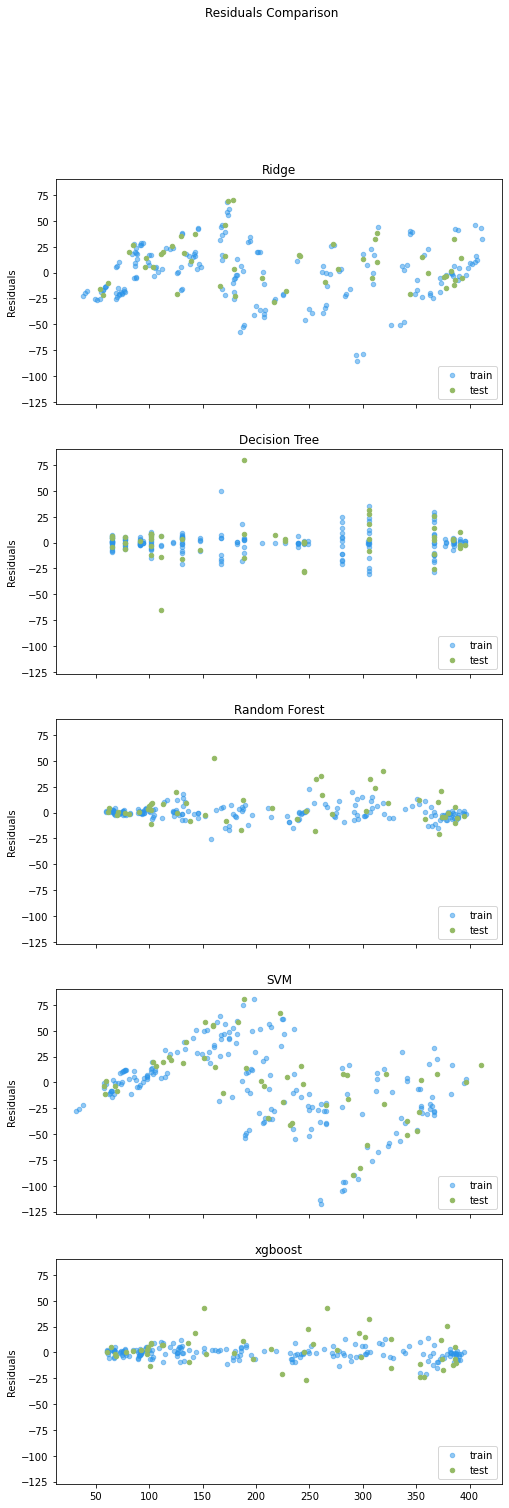

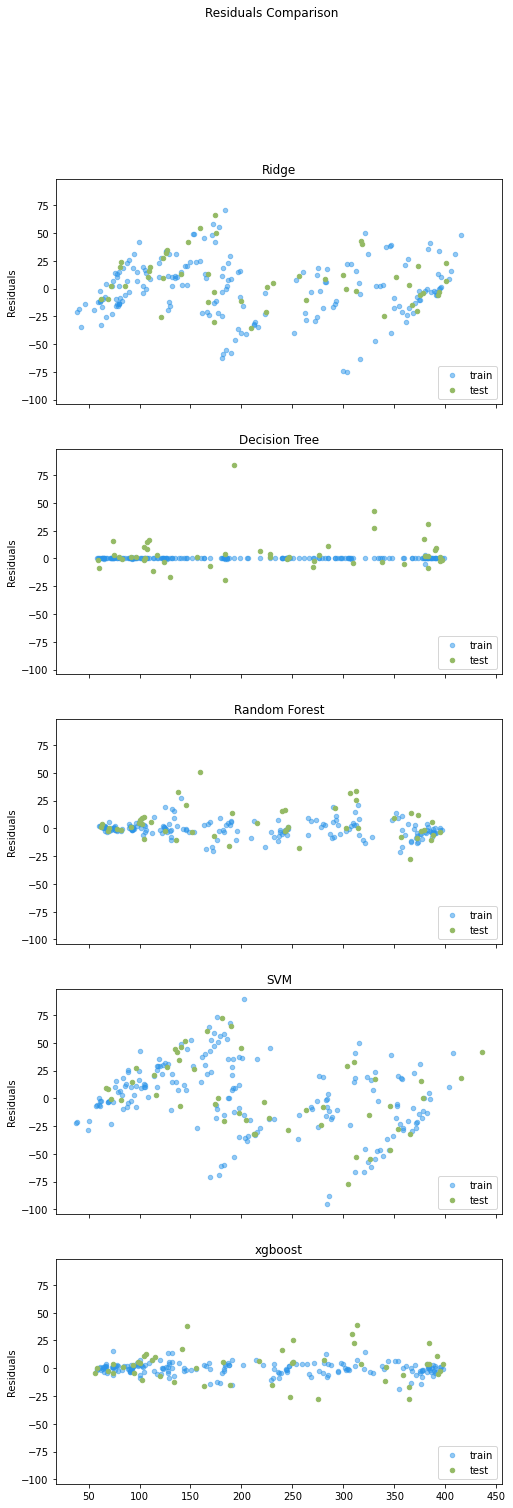

In [55]:
# Draw residuals scatter of different models
# parameter: models - list stored pre trained models
#            models_name - models' name
#            x_train - features' train data set
#            x_test - features' test data set
#            y_train - response value's train data set
#            y_test - features' test data set
# return: none
def residuals_compare(models, models_name, x_train, x_test, y_train, y_test):
    n = len(models)
    f, ax = plt.subplots(n, 1, sharex=True, sharey=True, figsize=(8, 24))
    f.suptitle("Residuals Comparison")
    for i in range(0, n):
        ax[i].set_ylabel('Residuals')
        ax[i].scatter(models[i].predict(x_train), models[i].predict(x_train) - y_train, \
            c='#2B94E9', s=20, alpha=0.5, label='train')
        ax[i].scatter(models[i].predict(x_test), models[i].predict(x_test) - y_test, \
            c='#94BA65', s=20, label='test')
        ax[i].set_title(models_name[i])
        ax[i].legend(loc='lower right')
    
    plt.show()
models_name = ['Ridge', 'Decision Tree', 'Random Forest', 'SVM', 'xgboost']

# Draw orgin models' residuals scatter
residuals_compare(models[0], models_name, x_train, x_test, y_train, y_test)
# Draw models with sentiment factor's residuals scatter
residuals_compare(models[1], models_name, x_train1, x_test1, y_train1, y_test1)

#### 2) metrics compare

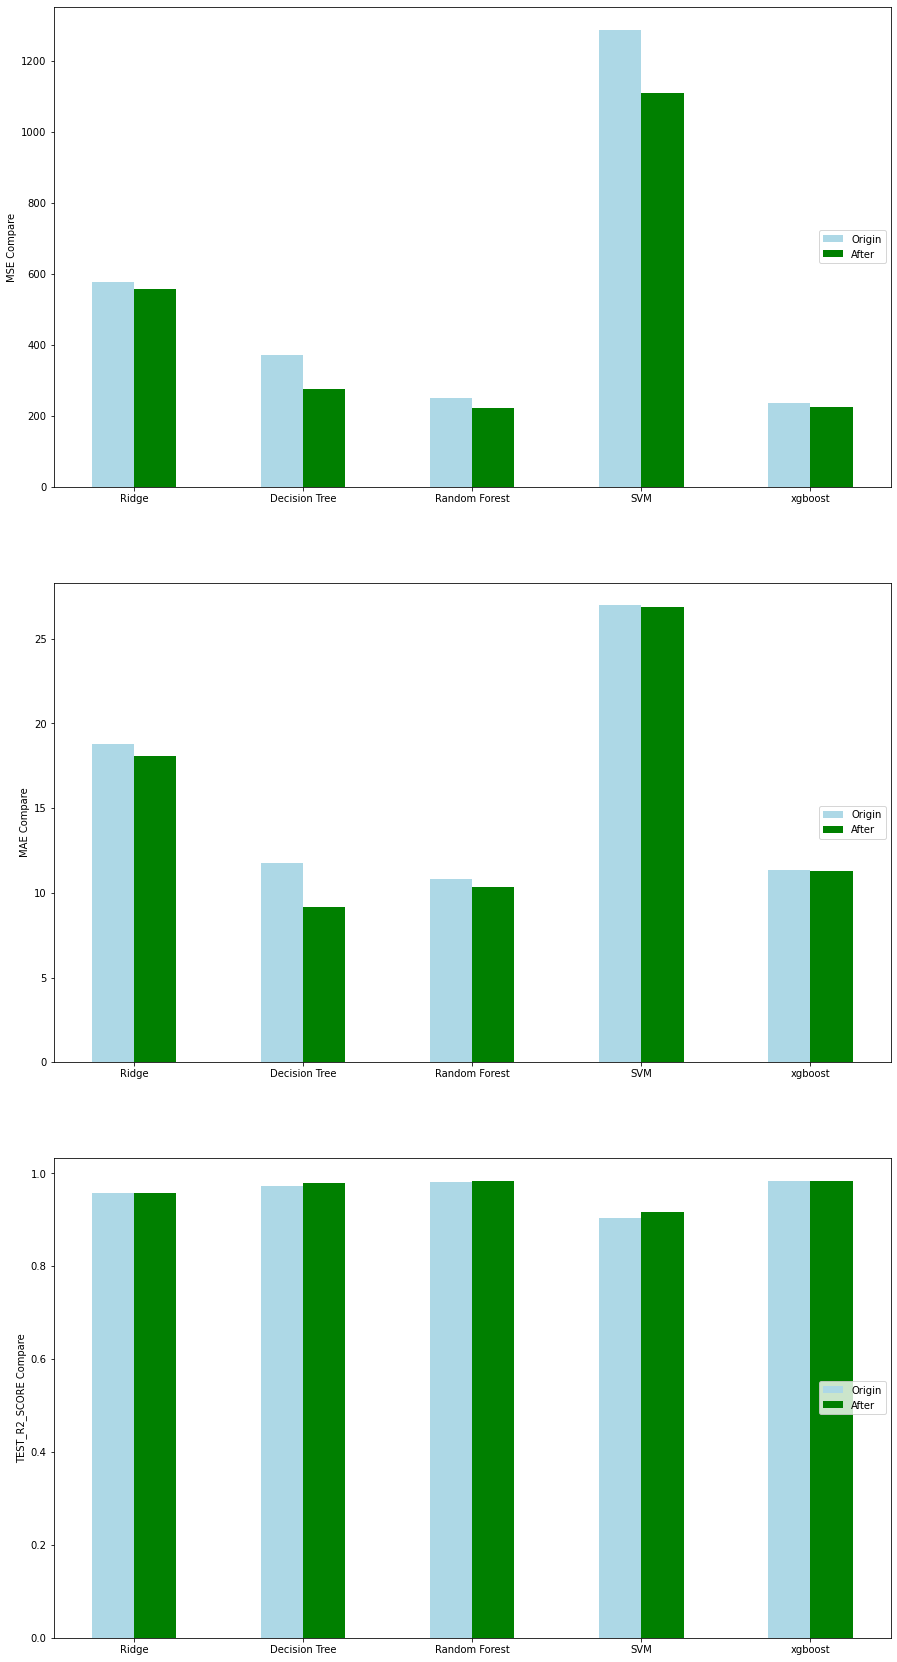

In [46]:
# models compare(based on metrics)
# parameter: models_metrics - dict stored metrics we need
#            models_name - list stored models' name
# return: none
def metrics_compare(models_metrics, models_name):
    fig = plt.figure(figsize=(15, 30))

    def _draw_each(ax, models_metrics, name):
        width = 0.25
        x = np.arange(len(models_name))
        ax.bar(x - width/2, models_metrics[name][0], width, label='Origin',color='lightblue')
        ax.bar(x + width/2, models_metrics[name][1], width, label='After',color='green')
        ax.set_ylabel(name.upper() + " Compare")
        ax.set_xticks(x)
        ax.set_xticklabels(labels=models_name)
        ax.legend(loc='right')

    ax = fig.add_subplot(311)
    _draw_each(ax, models_metrics, 'mse')
    ax = fig.add_subplot(312)
    _draw_each(ax, models_metrics, 'mae')
    ax = fig.add_subplot(313)
    _draw_each(ax, models_metrics, 'test_r2_score')
    plt.show()

metrics_compare(models_metrics, models_name)


#### 3) Overfitted Validation

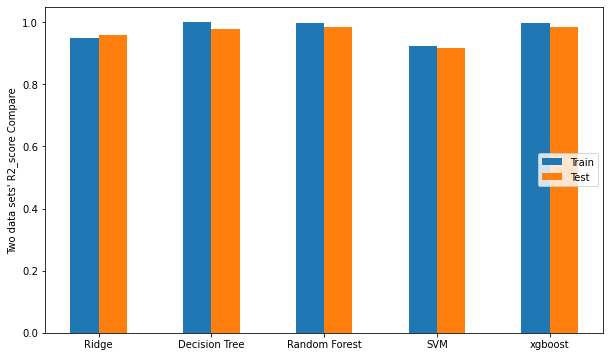

In [60]:
# check models with sentiment factor are overfitted or not(based on r2_score)
# parameter: models - list stored models pre trained
#            models_name - list stored models' name
#            test_r2_score - list stored r2_score for test data set
#            x_train - features' train data set
#            y_train - response's train data set
def overfit_vali(models, models_name, test_r2_score, x_train, y_train):
    train_r2_score = [r2_score(y_train, i.predict(x_train)) for i in models[1]]
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    width = 0.25
    x = np.arange(len(models_name))
    ax.bar(x - width/2, train_r2_score, width, label='Train')
    ax.bar(x + width/2, test_r2_score, width, label='Test')
    ax.set_ylabel('Two data sets\' R2_score Compare')
    ax.set_xticks(x)
    ax.set_xticklabels(labels=models_name)
    ax.legend(loc='right')
    plt.show()

overfit_vali(models, models_name, models_metrics['test_r2_score'][1], x_train1, y_train1)
